In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 定义数据集类
* 随机生成一个数据集，容量600，并划分80%训练集，20%测试集。
* 数据包含两个类别，分别标注“0”和“1”；
* 每个类别包含2个特征。

In [12]:
# 加载随机数据集，定义数据集类
class my_dataset():
    def __init__(self, data_size=300):
        self.data_size = data_size

    #训练集数据
    def get_train_data(self):
        data_size = int(self.data_size * 0.8)
        data_label = np.zeros((2 * data_size, 1))
        # class 1
        x1 = np.reshape(np.random.normal(1, 0.6, data_size), (data_size, 1))
        y1 = np.reshape(np.random.normal(1, 0.8, data_size), (data_size, 1))
        data_train = np.concatenate((x1, y1), axis=1)
        data_label[0:self.data_size, :] = 0  # 0

        # class 2
        x2 = np.reshape(np.random.normal(-1, 0.3, data_size), (data_size, 1))
        y2 = np.reshape(np.random.normal(-1, 0.5, data_size), (data_size, 1))
        data_train = np.concatenate((data_train, np.concatenate((x2, y2), axis=1)), axis=0)
        data_label[data_size:2 * data_size, :] = 1
        return data_train, data_label

    def get_test_data(self):
        data_size = int(self.data_size * 0.2)
        testdata_label = np.zeros((2 * data_size, 1))
        # class 1
        x1 = np.reshape(np.random.normal(1, 0.6, data_size), (data_size, 1))
        y1 = np.reshape(np.random.normal(1, 0.8, data_size), (data_size, 1))
        data_test = np.concatenate((x1, y1), axis=1)
        testdata_label[0:data_size, :] = 0

        # class 2
        x2 = np.reshape(np.random.normal(-1, 0.3, data_size), (data_size, 1))
        y2 = np.reshape(np.random.normal(-1, 0.5, data_size), (data_size, 1))
        data_test = np.concatenate((data_test, np.concatenate((x2, y2), axis=1)), axis=0)
        testdata_label[data_size:2 * data_size, :] = 1
        return data_test, testdata_label

## 定义LDA类
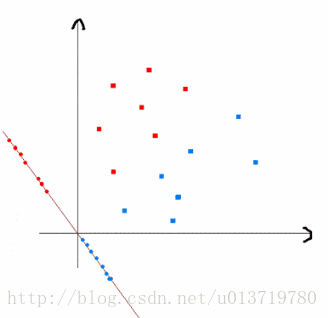

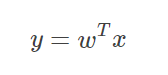

* 类内散度矩阵
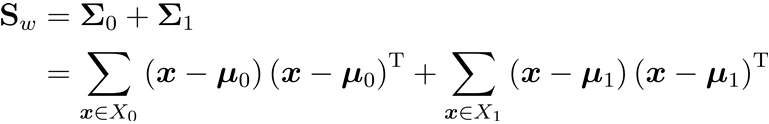

* 映射矩阵
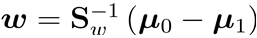

* 奇异分解
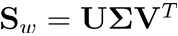

* 广义拟
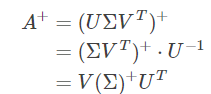

In [13]:
class LDA():
    def __init__(self):
        self.w = None

    def calculate_covariance_matrix(self, X, Y=None):
        # 计算协方差矩阵
        m = X.shape[0]
        X = X - np.mean(X, axis=0)
        Y = X if Y == None else Y - np.mean(Y, axis=0)
        return 1 / m * np.matmul(X.T, Y)

    #LDA拟合过程
    def fit(self,X,y):
        # 按类划分
        X0 = X[y.reshape(-1) == 0]
        X1 = X[y.reshape(-1) == 1]

        # 计算两类数据变量的协方差矩阵
        sigma0 = self.calculate_covariance_matrix(X0)
        sigma1 = self.calculate_covariance_matrix(X1)
        # 计算类内散度矩阵
        Sw = sigma0 + sigma1

        # 分别计算两类数据自变量的均值和方差
        u0, u1 = X0.mean(0), X1.mean(0)
        mean_diff = np.atleast_1d(u0 - u1)  # atleast_1d将输入转换为至少一维的数组
        # 对类内矩阵进行奇异值分解
        U, S, V = np.linalg.svd(Sw)
        # 计算类内散度矩阵的逆
        Sw_ = np.dot(np.dot(V, np.linalg.pinv(np.diag(S))), U.T)
        # 计算w
        self.w = Sw_.dot(mean_diff)
        # # 判别权重矩阵
        # self.w = np.dot(np.mat(Sw).I, (np.mean(X0, axis=0) - np.mean(X1, axis=0)).reshape((len(np.mean(X0, axis=0)), 1)))
        return self.w

    #LDA分类预测：
    def predict(self,X):
        y_pred=[]
        for sample in X:
            h=sample.dot(self.w)
            y=1*(h<0)
            y_pred.append(y)
        return y_pred

    # LDA分类预测：
    def class_visu(self,X, y):
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
        X2 = np.array([X[i] for i in range(len(X)) if y[i] == 1])

        X1_new = np.dot(X1, self.w)  # 向量的点积几何意义：相当于点在投影矩阵上的投影，所以根据求得的投影矩阵w求取新的值
        X2_new = np.dot(X2, self.w)

        y1_new = [1 for i in range(len(X1))] # 投影后打上新的标签
        y2_new = [1 for i in range(len(X2))]

        return X1_new, X2_new, y1_new, y2_new

In [14]:
# 加载数据
dataset = my_dataset(300)
x_train, y_train = dataset.get_train_data()
x_test, y_test = dataset.get_test_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 对数据进行标准化处理
from sklearn.preprocessing import StandardScaler
dataset_normalizer = StandardScaler().fit(x_train)
x_train = dataset_normalizer.transform(x_train)
x_test = dataset_normalizer.transform(x_test)

(480, 2)
(480, 1)
(120, 2)
(120, 1)


In [15]:
# 实例化
lda = LDA()
w = lda.fit(x_train, y_train)
y_pred=lda.predict(x_test)

print("分界面权向量w=", w)
print("测试集预测值为：", y_pred)
print("测试集预测精度为acc=",np.sum(y_pred==y_test.reshape(-1))/len(y_pred))

分界面权向量w= [4.46992555 3.16662267]
测试集预测值为： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
测试集预测精度为acc= 0.9833333333333333


[4.46992555 3.16662267]


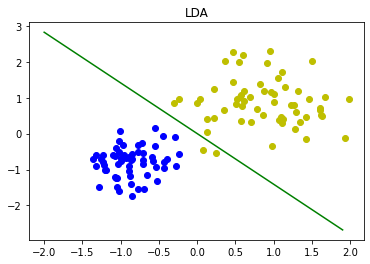

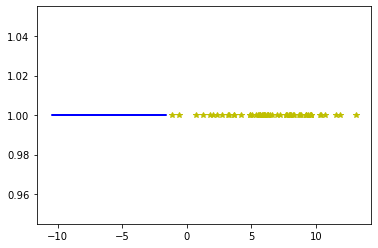

In [16]:
# 可视化w
w = np.array(w)
print(w)
x = np.arange(-2, 2, 0.1)
y = np.array((-w[0] * x)/w[1])

# LDA映射可视化
x_test_1 = np.array([x_test[i] for i in range(len(x_test)) if y_test[i] == 0])
x_test_2 = np.array([x_test[i] for i in range(len(x_test)) if y_test[i] == 1])
# 对测试集数据进行映射
X1_new, X2_new, y1_new, y2_new = lda.class_visu(x_test, y_test)

# 可视化结果
plt.figure(0)
plt.title('LDA')
plt.scatter(x_test_1[:, 0], x_test_1[:, 1], marker='o', c='y')
plt.scatter(x_test_2[:, 0], x_test_2[:, 1], marker='o', c='b')
plt.plot(x, y, c='g')

plt.figure(1)
plt.plot(X1_new, y1_new, 'y*')
plt.plot(X2_new, y2_new, 'b')
plt.show()

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
# 与sklearn中的LDA函数对比
lda2 = LinearDiscriminantAnalysis()
lda2.fit(x_train, y_train)
y_pred = lda2.predict(x_test)
print(y_pred)
print(lda2.score(x_test, y_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.9833333333333333


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
